In [386]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats 
import itertools

Some beta distributions with parameters 0.9 and 1:

In [387]:
P_o = np.random.beta(5, 10, (1, 10000))

$\beta(0.9, 1)$:

(0.0, 1.0)

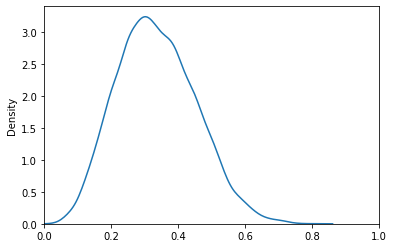

In [388]:
sns.kdeplot(P_o[0])
plt.xlim(0, 1)

Messages cost:

In [428]:
# message_c = {'all': 0, 'some': 0, 'no':0, 'notall': 0}
message_c = {'all': 0, 'some': 0, 'no':0, 'notall': 1}

Messages in different worlds:

In [416]:
all_ = {'w_all': 1, 'w_some': 0, 'w_no': 0}
some_ = {'w_all': 1, 'w_some': 1, 'w_no': 0}
no_ = {'w_all': 0, 'w_some': 0, 'w_no': 1}
notall_ = {'w_all': 0, 'w_some': 1, 'w_no': 1}

Helper dictionary (not important)

In [417]:
messages = {'all': all_, 'some': some_, 'no': no_, 'notall': notall_}

In [418]:
prob_message = {'all': 1/3, 'some': 2/3, 'no': 1/3, 'notall': 2/3}

Let's fix n at 10, then the formula (6) from the paper given the assumption that $P_0 = p_0^n$

In [419]:
def P(p_0, world, n):
    if world == 'w_all':
        return (p_0 ** n)
    elif world == 'w_no':
        return ((1 - p_0)**n)
    else:
        return (1 - (p_0 ** n + (1 - p_0)**n))

In [420]:
def P_0(p_0, world, message, n):
    if messages.get(message).get(world) == 1:
        # if message is valid in the world, return its probability
        if world == 'w_all':
            return P(p_0, world, n)/prob_message.get(message)
        elif world == 'w_no':
            return P(p_0, world, n)/prob_message.get(message)
        else:
            return P(p_0, world, n)/prob_message.get(message)
    else:
        # othervise return 0
        return 0

Calculate utility (formula 16):

$log(P_0(w|message)) - cost(m)$

In [421]:
def utility(message, world, p_0, n):
    return np.log(P_0(p_0, world, message, n)) - message_c.get(message)

Return the best message given the world:

In [422]:
def m(p_0, w, n):
    dic_res = {}
    for element in message_c.keys():
        dic_res[element] = utility(message=element, world=w, p_0=p_0, n=n)
    winner = max(dic_res, key=dic_res.get)
#     print('The winner is {}, with the utility of {}'.format(winner, dic_res.get(winner)))
    return dic_res.get(winner)

In [423]:
m(0.00001, w='w_no', n=10)

<ipython-input-421-dec0c9373baa>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(P_0(p_0, world, message, n)) - message_c.get(message)


0.4053651076081616

$$\sum_{P_0} P(P_0) \times (\sum_{w} P(w) \times U(m(P_0,M,w), w, P_0))$$

- How to calculate $P(w)$?
- P(P_0) -- just get the probability from the distribution?
- P -- probability of random p is q
- Add a no message? What would be different number of messages?

$P_0(all) = P_0^{n}$ -- n = number of elements

$P_0: f(p_0)$

How this value will wary with the parameters of the beta distribution?

We can replace P_0 for f(p)

In [424]:
@np.vectorize
def expected_U(a, b, n=10):
    res = []
    for i in np.arange(0.01, 1, 0.01):
        sum_utility = []
        for world in ['w_all', 'w_all', 'w_some']:
            sum_utility.append(m(i, world, n) * P(i, world, n))
        res.append(scipy.stats.beta(a, b).pdf(i))
    return(sum(res))

In [434]:
X = np.arange(0.01, 50, 1)
Y = np.arange(0.01, 50, 1)
X, Y = np.meshgrid(X, Y)

In [435]:
Z = expected_U(X, Y)

<ipython-input-421-dec0c9373baa>:2: RuntimeWarning: divide by zero encountered in log
  return np.log(P_0(p_0, world, message, n)) - message_c.get(message)


Text(0.5, 0, 'Expected utility')

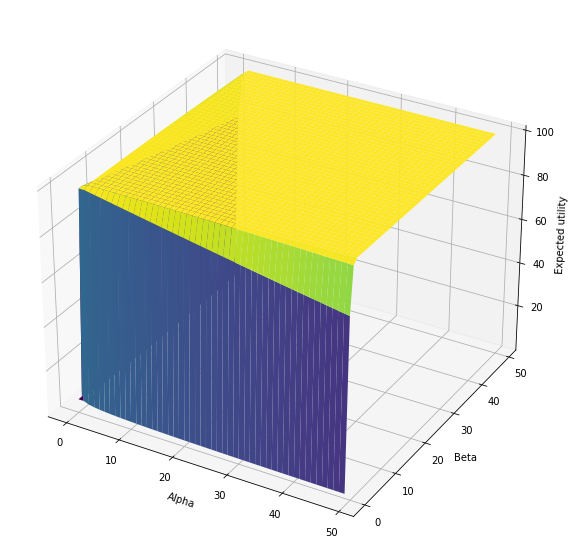

In [436]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
# ax.contour3D(X, Y, Z, 100, cmap='binary')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_xlabel('Alpha')
ax.set_ylabel('Beta')
ax.set_zlabel('Expected utility')

In [437]:
del X, Y, Z